# Funwave-tvd Visualization

The first cell code will read the funwave-tvd input file, and get some basic parameters for visualization.
Please execute the below code firstly, then you could generate plots separately. 

In [10]:
import numpy as np
import re

para_value_pairs = {
    "Mglob"      : "",    # global dimension in x direction
    "Nglob"      : "",    # global dimension in y direction
    "TOTAL_TIME" : "",    # simulation time in seconds
    "PLOT_INTV"  : "",    # output interval in seconds
    "DX"         : "",    # grid size(m) in x direction
    "DY"         : ""     # grid size(m) in y direction
}

try: 
    with open("output/input.txt", "r") as fd:
        for line in fd.readlines():
            g = re.search('(\w+)\s*=\s*(\S+)', line)
            if g:
                name = g.group(1)
                if name in para_value_pairs:
                    para_value_pairs[name] = g.group(2)
except Exception as ex_results: 
    print ("Error: ", ex_results)
    
Mglob = int(para_value_pairs['Mglob'])
Nglob = int(para_value_pairs['Nglob'])
TOTAL_TIME = float(para_value_pairs['TOTAL_TIME'])
PLOT_INTV = float(para_value_pairs['PLOT_INTV'])
DX = float(para_value_pairs['DX'])
DY = float(para_value_pairs['DY'])

opdir = "output/output/"

## Time Series 1D
Here you could generate time series 1D plot with output variables, including elevation, u, v, Hmax, Hmix...., on specific location. 
Just change the location_x, location_y, output_var and unit.

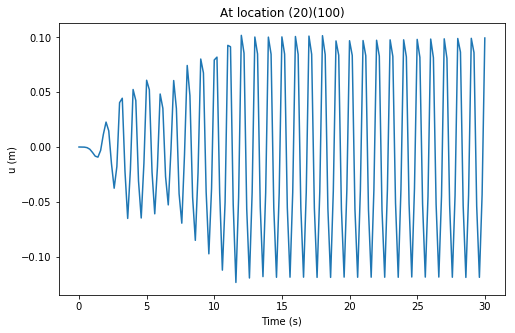

In [8]:
import matplotlib.pyplot as plt
# revise the location_x from 1 to 200
# revise the location_y from 1 to 600
location_x = 20
location_y = 100
output_var = "u" 
unit ='(m)'

total_frame = int(TOTAL_TIME/PLOT_INTV + 1)

def OneD(location_x, location_y):
    plt.clf()
    plt.cla()
    plt.close()
    
    fig, ax = plt.subplots()
    
    X = []
    Y = []
    
    try: 
        for frame in range(total_frame):
            y = np.loadtxt(opdir+output_var+'_%05d' % (frame+1))
            Y.append(y[location_x][location_y])
        
        for i in range(total_frame):
            time = '%.2f' % ((i)*PLOT_INTV)
            X.append(time)

        ax.plot(X,Y)
        ax.set_title("At location ("+str(location_x)+")("+str(location_y)+")")
        ax.set_ylabel(output_var+" "+unit)
        ax.set_xlabel("Time (s)")
        plt.show()
        
    except Exception as ex_results:
        print ("Error: ", ex_results)
        plt.close()
    
OneD(location_x, location_y)

## Individual Snapshot 
Here you could generate plot with any individual snapshot, including elevation, u, v and depth. 
Just change the frame and plot_title variables.

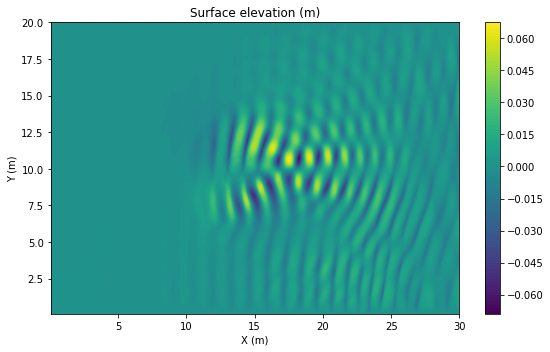

In [9]:
import matplotlib.pyplot as plt1

# change the frame as you want to show
frame = "v_00120"
plot_title = "Surface elevation (m)"

def twoDsnapPlot(frame):    
    
    X_value = [ [ str((i+1)*DX) for i in range(Mglob) ] for j in range(Nglob) ]
    Y_value = [ [ str((j+1)*DY) for i in range(Mglob) ] for j in range(Nglob) ]
    
    try: 
        eta = np.loadtxt(opdir+frame)
        etaplot = plt1.contourf(X_value, Y_value, eta, 100)
        plt1.title(plot_title)
        #plt1.title("Surface elevation (m) at t = "+str(time))
        plt1.colorbar()
        plt1.xlabel("X (m)")
        plt1.ylabel("Y (m)")
        plt1.tight_layout()
        plt1.show()
    except Exception as ex_results:
        print ("Error: ", ex_results)
        
twoDsnapPlot(frame)

##  Animation 2D
Here you could generate 2D animation with part of or all of results, including elevation, u and v...  Just change the start_time, end_time and output_var. 

In [4]:
import matplotlib.pyplot as plt2
from matplotlib import animation
from IPython.display import HTML

start_time = "19"
end_time = "20.0"
output_var = "eta"


def twoDsnapAnim(start, end):
    #fig = plt2.figure()
    fig, ax = plt2.subplots()
    
    X_value = [ [ str((i+1)*DX) for i in range(Mglob) ] for j in range(Nglob) ]
    Y_value = [ [ str((j+1)*DY) for i in range(Mglob) ] for j in range(Nglob) ]
    
    fig_size = []
    fig_size.append(8)
    fig_size.append(5)
    plt2.rcParams["figure.figsize"] = fig_size
    
    def animate(i):
        ax.clear()
        try:
            Eta = np.loadtxt(opdir+output_var+'_%05d' % (i+1))
            img = ax.contourf(X_value, Y_value, Eta, 100)
            plt.colorbar(img)
            plt.close()
            time = '%.2f' % ((i+1)*(PLOT_INTV))
            ax.set_title('Time = '+ time +' sec')
            ax.set_xlabel("X (m)")
            ax.set_ylabel("Y (m)")
            return ax
        except Exception as ex_results:
            print ("Error: ", ex_results)
            plt2.close()

    # make animate 
    try: 
        anim = animation.FuncAnimation(fig, animate, np.arange(int(float(start)/PLOT_INTV), int(float(end)/PLOT_INTV)), 
                                   interval=200,blit=False)
        display(HTML(anim.to_html5_video()))
    except Exception as ex_results:
        print ("Error: ", ex_results)
        plt2.close()

twoDsnapAnim(start_time, end_time)

## Cross-shore Profile animation 2D
Here you could generate 2D cross-shore profile animation with elevation results. Just change start_time, end_time and depth_loc. 

In [5]:
import matplotlib.pyplot as plt3
from matplotlib import animation
from IPython.display import HTML


# revise depth_loc from 1 to 200
depth_loc = '100'
start_time = "14"
end_time = "15"
    

def depProfileWithEta(depth, start, end):
    # open depth file 
    try:
        depthfile = open(opdir+'dep.out','r')
        depthdata = depthfile.readlines()[int(depth)-1]
        p = depthdata.split()
    except Exception as ex_results:
        print ("Error: ", ex_results)

    # load depth data to dep_value
    dep_value = []
    for i in range(int(Mglob)):
        dep_value.append(-abs(float(p[i])))

    # create x_value
    x_value = []
    for i in range(int(Mglob)):
        x_value.append((i+1)*DX)
    
    #fig = plt.figure()
    fig, ax = plt3.subplots()

    # create etas that contains all of needing eta data
    etas = []
    length = int(TOTAL_TIME/PLOT_INTV)
    try:
        for i in range(length):
            etafile = open(opdir+'eta_%05d' % (i+1))
            etadata = etafile.readlines()[int(depth)-1]
            etap = etadata.split()
            eta_value = []
            for m in range(int(Mglob)):
                eta_value.append(float(etap[m]))
            etas.append(eta_value)
            etafile.close()
    except Exception as ex_results:
        print ("Error: ", ex_results)

    # define animate function
    def animate(i):
        ax.clear()
        ax.plot(x_value, etas[i], color='#33FFFF')
        ax.plot(x_value, dep_value, color='#FFFF00')
        ax.fill_between(x_value,-1, etas[i], facecolor='#33FFFF')
        ax.fill_between(x_value,-1, dep_value, facecolor='#FFFF00')
        time = '%.2f' % ((i+1)*PLOT_INTV)
        ax.set_title('Time = '+ time +' sec')
        #plt.ylim(-0.45,0.1)
        #plt.xlabel("X (m)")
        #plt.ylabel("Elevation (m)")
        plt3.close()
        ax.set_xlabel("X (m)")
        ax.set_ylabel("Elevation (m)")
        ax.set_ylim(-0.45,0.1)
        
        return ax

    # make animate 
    anim = animation.FuncAnimation(fig, animate, np.arange(int(float(start)/PLOT_INTV), int(float(end)/PLOT_INTV)),
                                   interval=200, blit=False)
    display(HTML(anim.to_html5_video()))
    

depProfileWithEta(depth_loc, start_time, end_time)